Preparing the environment

In [1]:
import re
import nltk
import string
import heapq

In [2]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ITS\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [3]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ITS\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [4]:
original_text = """Dengue remains a significant public health issue in Bangladesh despite vector control initiatives over the past ten years that have targeted mosquitoes and their breeding grounds. In comparison to 20% of the remaining months (August to March) of the same 12-year period, over 81 percent of the months of April, May, June, and July from 2008 to 2019 had a monthly GF of >1. These consistent results over a long period of time point to the significance of an early vector control campaign in Bangladesh. The month of June was the one in which we found the highest GF, suggesting the peak month for transmission, meaning that there were more secondary cases of dengue in June than any other month. This might be due to the availability of vulnerable human hosts at the start of the transmission seasons along with favorable environmental variables (rainfall that coincides with higher temperatures). June is one of the warmest months of the year in Bangladesh and the first month of the monsoon season. More rapid transmission cycles and infection rates are anticipated as a result of the interaction between increased rainfall, which favorably influences Aedes mosquito breeding locations, and increased temperatures, which are predicted to shorten the extrinsic incubation period and biting interval . We argue that starting the vector-control program in April would be ideal because the estimated GF began to exceed 1 in April and remained above 1 through July. Our analysis revealed that the early transmission season (April–July), when dengue cases are rising at a higher rate, presents an opportunity to launch the vector control program sooner and more successfully reduce dengue incidence. We advise trying out earlier community involvement for eradicating Aedes breeding areas, since this could improve overall control and possibly lower case occurrence."""

In [5]:
original_text = re.sub(r'\s+', ' ', original_text)
original_text

'Dengue remains a significant public health issue in Bangladesh despite vector control initiatives over the past ten years that have targeted mosquitoes and their breeding grounds. In comparison to 20% of the remaining months (August to March) of the same 12-year period, over 81 percent of the months of April, May, June, and July from 2008 to 2019 had a monthly GF of >1. These consistent results over a long period of time point to the significance of an early vector control campaign in Bangladesh. The month of June was the one in which we found the highest GF, suggesting the peak month for transmission, meaning that there were more secondary cases of dengue in June than any other month. This might be due to the availability of vulnerable human hosts at the start of the transmission seasons along with favorable environmental variables (rainfall that coincides with higher temperatures). June is one of the warmest months of the year in Bangladesh and the first month of the monsoon season.

In [6]:
stopwords = nltk.corpus.stopwords.words('english')
print(stopwords)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [7]:
stopwords.append('explanation')

In [8]:
print(stopwords)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [9]:
def preprocess(text):
  formatted_text = text.lower()
  tokens = []
  for token in nltk.word_tokenize(formatted_text):
    tokens.append(token)
  tokens = [word for word in tokens if word not in stopwords and word not in string.punctuation]
  formatted_text = ' '.join(element for element in tokens)

  return formatted_text

In [10]:
formatted_text = preprocess(original_text)
formatted_text

'dengue remains significant public health issue bangladesh despite vector control initiatives past ten years targeted mosquitoes breeding grounds comparison 20 remaining months august march 12-year period 81 percent months april may june july 2008 2019 monthly gf 1 consistent results long period time point significance early vector control campaign bangladesh month june one found highest gf suggesting peak month transmission meaning secondary cases dengue june month might due availability vulnerable human hosts start transmission seasons along favorable environmental variables rainfall coincides higher temperatures june one warmest months year bangladesh first month monsoon season rapid transmission cycles infection rates anticipated result interaction increased rainfall favorably influences aedes mosquito breeding locations increased temperatures predicted shorten extrinsic incubation period biting interval argue starting vector-control program april would ideal estimated gf began exc

Function to calculate sentences score

In [11]:
def calculate_sentences_score(sentences, important_words, distance):
  scores = []
  sentence_index = 0

  for sentence in [nltk.word_tokenize(sentence) for sentence in sentences]:
    #print('------------')
    #print(sentence)

    word_index = []
    for word in important_words:
      #print(word)
      try:
        word_index.append(sentence.index(word))
      except ValueError:
        pass

    word_index.sort()
    #print(word_index)

    if len(word_index) == 0:
      continue

    # [0, 1, 5]
    groups_list = []
    group = [word_index[0]]
    i = 1 # 3
    while i < len(word_index): # 3
      # first execution: 1 - 0 = 1
      # second execution: 2 - 1 = 1
      if word_index[i] - word_index[i - 1] < distance:
        group.append(word_index[i])
        #print('group', group)
      else:
        groups_list.append(group[:])
        group = [word_index[i]]
        #print('group', group)
      i += 1
    groups_list.append(group)
    #print('all groups', groups_list)

    max_group_score = 0
    for g in groups_list:
      #print(g)
      important_words_in_group = len(g)
      total_words_in_group = g[-1] - g[0] + 1
      score = 1.0 * important_words_in_group**2 / total_words_in_group
      #print('group score', score)

      if score > max_group_score:
        max_group_score = score

    scores.append((max_group_score, sentence_index))
    sentence_index += 1

  #print('final scores', scores)
  return scores

In [12]:
test = ['a', 'b', 'c']
test.index('b')

1

In [13]:
test = [0,1,3,4,6,9]
test[-2], test[0] + 1

(6, 1)

In [14]:
3 ** 3

27

Function to summarize the texts

In [15]:
def summarize(text, top_n_words, distance, number_of_sentences, percentage = 0):
  original_sentences = [sentence for sentence in nltk.sent_tokenize(text)]
  #print(original_sentences)
  formatted_sentences = [preprocess(original_sentence) for original_sentence in original_sentences]
  #print(formatted_sentences)
  words = [word for sentence in formatted_sentences for word in nltk.word_tokenize(sentence)]
  #print(words)
  frequency = nltk.FreqDist(words)
  #print(frequency)
  #return frequency
  top_n_words = [word[0] for word in frequency.most_common(top_n_words)]
  #print(top_n_words)
  sentences_score = calculate_sentences_score(formatted_sentences, top_n_words, distance)
  #print(sentences_score)
  if percentage > 0:
    best_sentences = heapq.nlargest(int(len(formatted_sentences) * percentage), sentences_score)
  else:  
    best_sentences = heapq.nlargest(number_of_sentences, sentences_score)
  #print(best_sentences)
  best_sentences = [original_sentences[i] for (score, i) in best_sentences]
  #print(best_sentences)
  return original_sentences, best_sentences, sentences_score
   
    

In [16]:
original_sentences, best_sentences, sentences_score = summarize(original_text, 5, 2, 3)

In [17]:
original_sentences

['Dengue remains a significant public health issue in Bangladesh despite vector control initiatives over the past ten years that have targeted mosquitoes and their breeding grounds.',
 'In comparison to 20% of the remaining months (August to March) of the same 12-year period, over 81 percent of the months of April, May, June, and July from 2008 to 2019 had a monthly GF of >1.',
 'These consistent results over a long period of time point to the significance of an early vector control campaign in Bangladesh.',
 'The month of June was the one in which we found the highest GF, suggesting the peak month for transmission, meaning that there were more secondary cases of dengue in June than any other month.',
 'This might be due to the availability of vulnerable human hosts at the start of the transmission seasons along with favorable environmental variables (rainfall that coincides with higher temperatures).',
 'June is one of the warmest months of the year in Bangladesh and the first month o

In [18]:
best_sentences

['The month of June was the one in which we found the highest GF, suggesting the peak month for transmission, meaning that there were more secondary cases of dengue in June than any other month.',
 'Our analysis revealed that the early transmission season (April–July), when dengue cases are rising at a higher rate, presents an opportunity to launch the vector control program sooner and more successfully reduce dengue incidence.',
 'We argue that starting the vector-control program in April would be ideal because the estimated GF began to exceed 1 in April and remained above 1 through July.']

In [19]:
summary = ' '.join(best_sentences)
summary

'The month of June was the one in which we found the highest GF, suggesting the peak month for transmission, meaning that there were more secondary cases of dengue in June than any other month. Our analysis revealed that the early transmission season (April–July), when dengue cases are rising at a higher rate, presents an opportunity to launch the vector control program sooner and more successfully reduce dengue incidence. We argue that starting the vector-control program in April would be ideal because the estimated GF began to exceed 1 in April and remained above 1 through July.'

In [20]:
len(summary)

586

In [21]:
sentences_score

[(1.0, 0),
 (1.0, 1),
 (1.0, 2),
 (2.0, 3),
 (1.0, 4),
 (1.0, 5),
 (1.0, 6),
 (1.0, 7),
 (1.0, 8)]

In [22]:
from IPython.core.display import HTML

In [23]:
def visualize(title, sentence_list, best_sentences):
  from IPython.core.display import HTML
  text = ''

  display(HTML(f'<h1>Summary - {title}</h1>'))
  for sentence in sentence_list:
    if sentence in best_sentences:
      text += ' ' + str(sentence).replace(sentence, f"<mark>{sentence}</mark>")
    else:
      text += ' ' + sentence
  display(HTML(f""" {text} """))

Extracting text from the internet

In [24]:
!pip3 install goose3

Defaulting to user installation because normal site-packages is not writeable


In [25]:
from goose3 import Goose

In [26]:
g = Goose()
url = 'https://en.wikipedia.org/wiki/Automatic_summarization'
article = g.extract(url)

In [27]:
article.cleaned_text

'Automatic summarization is the process of shortening a set of data computationally, to create a subset (a summary) that represents the most important or relevant information within the original content.\n\nIn addition to text, images and videos can also be summarized. Text summarization finds the most informative sentences in a document;[1] various methods of image summarization are the subject of ongoing research, with some looking to display the most representative images from a given collection or generating a video;[2][3][4] video summarization extracts the most important frames from the video content.[5]\n\nThere are two general approaches to automatic summarization: extraction and abstraction.\n\nHere, content is extracted from the original data, but the extracted content is not modified in any way. Examples of extracted content include key-phrases that can be used to "tag" or index a text document, or key sentences (including headings) that collectively comprise an abstract, an

In [28]:
original_sentences, best_sentences, score_sentences = summarize(article.cleaned_text, 100, 10, 80)

In [29]:
len(original_sentences)

300

In [30]:
(120 / len(original_sentences)) * 100

40.0

In [31]:
original_sentences

['Automatic summarization is the process of shortening a set of data computationally, to create a subset (a summary) that represents the most important or relevant information within the original content.',
 'In addition to text, images and videos can also be summarized.',
 'Text summarization finds the most informative sentences in a document;[1] various methods of image summarization are the subject of ongoing research, with some looking to display the most representative images from a given collection or generating a video;[2][3][4] video summarization extracts the most important frames from the video content.',
 '[5]\n\nThere are two general approaches to automatic summarization: extraction and abstraction.',
 'Here, content is extracted from the original data, but the extracted content is not modified in any way.',
 'Examples of extracted content include key-phrases that can be used to "tag" or index a text document, or key sentences (including headings) that collectively comprise

In [32]:
best_sentences

['Moreover, several important combinatorial optimization problems occur as special instances of submodular optimization.',
 'First summarizes that perform adaptive summarization have been created.',
 'In contrast, an abstractive keyphrase system would somehow internalize the content and generate keyphrases that do not appear in the text, but more closely resemble what a human might produce, such as "political negligence" or "inadequate protection from floods".',
 'Some techniques and algorithms which naturally model summarization problems are TextRank and PageRank, Submodular set function, Determinantal point process, maximal marginal relevance (MMR) etc.',
 'Sometimes one might be interested in generating a summary from a single source document, while others can use multiple source documents (for example, a cluster of articles on the same topic).',
 '[14]\n\nSupervised text summarization is very much like supervised keyphrase extraction.',
 'Automatic summarization is the process of s

In [33]:
score_sentences

[(5.882352941176471, 0),
 (2.25, 1),
 (5.28125, 2),
 (2.6666666666666665, 3),
 (1.125, 4),
 (4.545454545454546, 5),
 (2.56, 6),
 (2.7777777777777777, 7),
 (1.0, 8),
 (4.571428571428571, 9),
 (1.7777777777777777, 10),
 (2.0, 11),
 (2.5, 12),
 (0.6666666666666666, 13),
 (2.25, 14),
 (2.769230769230769, 15),
 (1.0, 16),
 (2.4, 17),
 (1.0, 18),
 (3.125, 19),
 (3.6, 20),
 (6.25, 21),
 (2.25, 22),
 (2.0, 23),
 (1.7857142857142858, 24),
 (3.5714285714285716, 25),
 (2.0, 26),
 (2.272727272727273, 27),
 (3.2, 28),
 (1.2857142857142858, 29),
 (2.0, 30),
 (4.923076923076923, 31),
 (1.0, 32),
 (4.0, 33),
 (3.5714285714285716, 34),
 (7.5625, 35),
 (1.0, 36),
 (1.2857142857142858, 37),
 (2.769230769230769, 38),
 (3.272727272727273, 39),
 (4.0, 40),
 (1.0, 41),
 (7.5625, 42),
 (0.8, 43),
 (2.0, 44),
 (3.1153846153846154, 45),
 (1.0, 46),
 (5.818181818181818, 47),
 (1.9230769230769231, 48),
 (1.8, 49),
 (4.166666666666667, 50),
 (2.0, 51),
 (2.0, 52),
 (1.2857142857142858, 53),
 (1.4545454545454546, 5

In [34]:
visualize(article.title, original_sentences, best_sentences)

Extracting articles from RSS feeds

In [35]:
!pip3 install feedparser

Defaulting to user installation because normal site-packages is not writeable


In [36]:
!pip3 install bs4

Defaulting to user installation because normal site-packages is not writeable


In [37]:
!pip3 install lxml

Defaulting to user installation because normal site-packages is not writeable


In [38]:
import feedparser

In [39]:
from bs4 import BeautifulSoup
import os
import json

In [40]:
url = 'https://www.aitrends.com/feed/'
feed = feedparser.parse(url)

ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host

In [ ]:
feed.entries

[{'title': 'Best Practices for Building the AI Development Platform in Government',
  'title_detail': {'type': 'text/plain',
   'language': None,
   'base': 'https://www.aitrends.com/feed/',
   'value': 'Best Practices for Building the AI Development Platform in Government'},
  'links': [{'rel': 'alternate',
    'type': 'text/html',
    'href': 'https://www.aitrends.com/ai-world-government/best-practices-for-building-the-ai-development-platform-in-government/'}],
  'link': 'https://www.aitrends.com/ai-world-government/best-practices-for-building-the-ai-development-platform-in-government/',
  'authors': [{'name': 'Allison Proffitt'}],
  'author': 'Allison Proffitt',
  'author_detail': {'name': 'Allison Proffitt'},
  'published': 'Thu, 28 Oct 2021 23:20:17 +0000',
  'published_parsed': time.struct_time(tm_year=2021, tm_mon=10, tm_mday=28, tm_hour=23, tm_min=20, tm_sec=17, tm_wday=3, tm_yday=301, tm_isdst=0),
  'tags': [{'term': 'AI World Government', 'scheme': None, 'label': None},
   {'

In [ ]:
for e in feed.entries:
    print(e.title)
    print(e.content[0].value)
    print('---------------------------------')

Best Practices for Building the AI Development Platform in Government
<img alt="" class="webfeedsFeaturedVisual wp-post-image" height="70" src="https://www.aitrends.com/wp-content/uploads/2021/10/10-29SoftwareDev-ArmedServices-2-100x70.jpeg" style="float: left; margin-right: 5px;" width="100" /><p><i><span>By John P. Desmond, AI Trends Editor</span></i><span> </span></p>
<p><span>The AI stack defined by Carnegie Mellon University is fundamental to the approach being taken by the US Army for its AI development platform efforts, according to Isaac Faber, Chief Data Scientist at the US Army AI Integration Center, speaking at the </span><a href="https://www.aiworldgov.com/"><span>AI World Government</span></a><span> event held in-person and virtually from Alexandria, Va., last week.</span><span> </span><span> </span></p>
<figure class="wp-caption alignleft" id="attachment_21162" style="width: 168px;"><img alt="" class="size-full wp-image-21162" height="289" src="https://www.aitrends.com/wp

In [ ]:
def clean_html(text):
  if text == '':
    return ''
  else:
    return BeautifulSoup(text, 'html.parser').get_text()

In [ ]:
e.content[0].value

'<img alt="" class="webfeedsFeaturedVisual wp-post-image" height="70" src="https://www.aitrends.com/wp-content/uploads/2021/10/10-22ForbiddenKnowledge-2-100x70.jpeg" style="float: left; margin-right: 5px;" width="100" /><p><i><span>By Lance Eliot, the AI Trends Insider</span></i><span>\xa0</span><span>\xa0\xa0</span><span>\xa0</span></p>\n<p><span>Are there things that we must not know?\xa0</span><span>\xa0</span><span>\xa0</span></p>\n<p><span>This is an age-old question.\xa0Some assert that there is the potential for knowledge that ought to not be known. In other words, there are ideas, concepts, or mental formulations that should we become aware of that knowledge it could be our downfall. The discovery or invention of some new innovation or way of thinking could be unduly dangerous. It would be best to not go there, as it were, and avoid ever landing on such knowledge: forbidden knowledge.</span><span>\xa0</span><span>\xa0</span><span>\xa0</span></p>\n<p><span>The typical basis for 

In [ ]:
clean_html(e.content[0].value)

'By Lance Eliot, the AI Trends Insider\xa0\xa0\xa0\xa0\nAre there things that we must not know?\xa0\xa0\xa0\nThis is an age-old question.\xa0Some assert that there is the potential for knowledge that ought to not be known. In other words, there are ideas, concepts, or mental formulations that should we become aware of that knowledge it could be our downfall. The discovery or invention of some new innovation or way of thinking could be unduly dangerous. It would be best to not go there, as it were, and avoid ever landing on such knowledge: forbidden knowledge.\xa0\xa0\xa0\nThe typical basis for wanting to forbid the discovery or emergence of forbidden knowledge is that the adverse consequences are overwhelming.\xa0The end result is so devastating and undercutting that the bad side outweighs the good that could be derived from the knowledge.\xa0\xa0\xa0\nIt is conceivable that there might be knowledge that is so bad that it has no good possibilities at all. Thus, rather than trying to ba

In [ ]:
articles = []
for e in feed.entries:
  articles.append({'title': e.title, 'content': clean_html(e.content[0].value)})

In [ ]:
articles

[{'title': 'Best Practices for Building the AI Development Platform in Government',
  'content': 'By John P. Desmond, AI Trends Editor\xa0\nThe AI stack defined by Carnegie Mellon University is fundamental to the approach being taken by the US Army for its AI development platform efforts, according to Isaac Faber, Chief Data Scientist at the US Army AI Integration Center, speaking at the\xa0AI World Government\xa0event held in-person and virtually from Alexandria, Va., last week.\xa0\xa0\nIsaac Faber, Chief Data Scientist, US Army AI Integration Center\n“If we want to move the Army from legacy systems through digital modernization, one of the biggest issues I have found is the difficulty in abstracting away the differences in applications,” he said. “The most important part of digital transformation is the middle layer, the platform that makes it easier to be on the cloud or on a local computer.” The desire is to be able to move your software platform to another platform, with the same

In [ ]:
save_file = os.path.join('feed.json')
feed = open(save_file, 'w+')
feed.write(json.dumps(articles, indent=1))
feed.close()

In [ ]:
blog_articles = json.loads(open('feed.json').read())
blog_articles

[{'title': 'Best Practices for Building the AI Development Platform in Government',
  'content': 'By John P. Desmond, AI Trends Editor\xa0\nThe AI stack defined by Carnegie Mellon University is fundamental to the approach being taken by the US Army for its AI development platform efforts, according to Isaac Faber, Chief Data Scientist at the US Army AI Integration Center, speaking at the\xa0AI World Government\xa0event held in-person and virtually from Alexandria, Va., last week.\xa0\xa0\nIsaac Faber, Chief Data Scientist, US Army AI Integration Center\n“If we want to move the Army from legacy systems through digital modernization, one of the biggest issues I have found is the difficulty in abstracting away the differences in applications,” he said. “The most important part of digital transformation is the middle layer, the platform that makes it easier to be on the cloud or on a local computer.” The desire is to be able to move your software platform to another platform, with the same

Word cloud

In [ ]:
feed_content = ''
for article in blog_articles:
  feed_content += article['content']

In [ ]:
feed_content

'By John P. Desmond, AI Trends Editor\xa0\nThe AI stack defined by Carnegie Mellon University is fundamental to the approach being taken by the US Army for its AI development platform efforts, according to Isaac Faber, Chief Data Scientist at the US Army AI Integration Center, speaking at the\xa0AI World Government\xa0event held in-person and virtually from Alexandria, Va., last week.\xa0\xa0\nIsaac Faber, Chief Data Scientist, US Army AI Integration Center\n“If we want to move the Army from legacy systems through digital modernization, one of the biggest issues I have found is the difficulty in abstracting away the differences in applications,” he said. “The most important part of digital transformation is the middle layer, the platform that makes it easier to be on the cloud or on a local computer.” The desire is to be able to move your software platform to another platform, with the same ease\xa0with\xa0which a new smartphone carries over the user’s contacts and histories.\xa0\xa0\n

In [ ]:
formatted_feed_content = preprocess(feed_content)
formatted_feed_content

'john p. desmond ai trends editor ai stack defined carnegie mellon university fundamental approach taken us army ai development platform efforts according isaac faber chief data scientist us army ai integration center speaking ai world government event held in-person virtually alexandria va. last week isaac faber chief data scientist us army ai integration center “ want move army legacy systems digital modernization one biggest issues found difficulty abstracting away differences applications ” said “ important part digital transformation middle layer platform makes easier cloud local computer. ” desire able move software platform another platform ease new smartphone carries user ’ contacts histories ethics cuts across layers ai application stack positions planning stage top followed decision support modeling machine learning massive data management device layer platform bottom “ advocating think stack core infrastructure way applications deployed siloed approach ” said “ need create d

In [ ]:
len(feed_content), len(formatted_feed_content)

(102389, 71569)

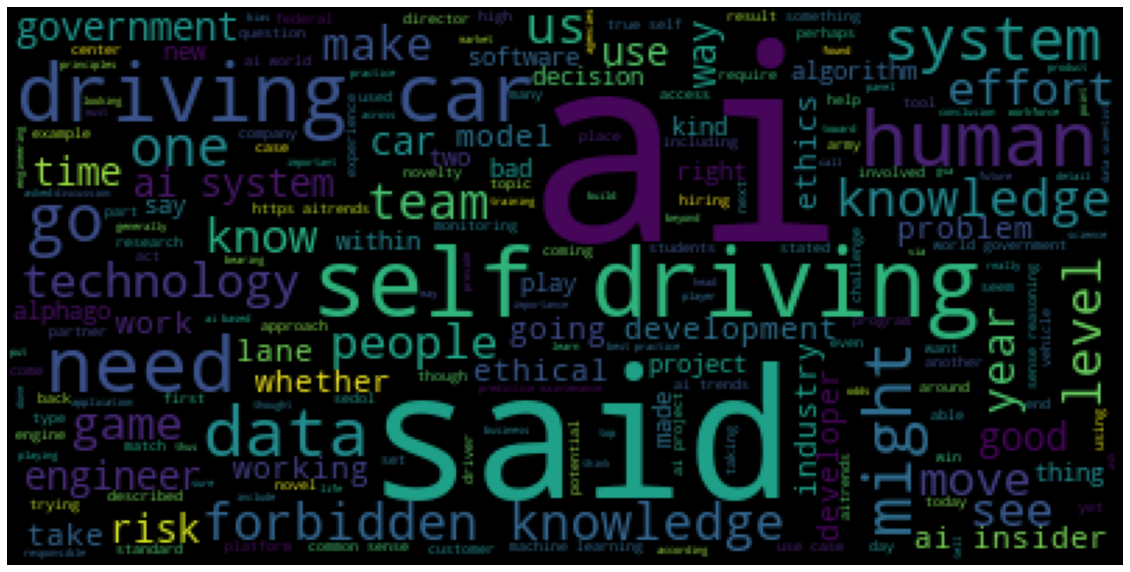

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.figure(figsize=(20,20))
plt.axis('off')

plt.imshow(WordCloud().generate(formatted_feed_content));

Extracting named entities

In [ ]:
!pip3 install spacy

Defaulting to user installation because normal site-packages is not writeable


In [ ]:
import spacy

In [ ]:
nlp = spacy.load("en_core_web_sm")
nlp

In [ ]:
document = nlp(formatted_feed_content)

In [ ]:
from spacy import displacy
displacy.render(document, style = 'ent', jupyter = True)

In [ ]:
for entity in document.ents:
    if entity.label_ == 'GPE':
      print(entity.text, entity.label_)

jordan GPE
utah GPE
hamburg germany GPE
california GPE
alumina GPE
alumina GPE
alumina GPE
alumina GPE
r.i. GPE
berkeley GPE
california GPE
calif. GPE
san francisco GPE
san francisco GPE
san francisco GPE


Summarize the articles

In [ ]:
def save_summary(title, original_sentences, best_sentences):
    HTML_TEMPLATE = """<html>
        <head>
        <title>{0}</title>
        <meta http-equiv="Content-Type" content="text/html; charset=UTF-8" />
        </head>
        <body>{1}</body>

    </html>"""
    text = ''
    for sentence in original_sentences:
        if sentence in best_sentences:
          text += str(sentence).replace(sentence, f"<mark>{sentence}</mark>")
        else:
          text += sentence
  
    save_file = open(os.path.join(title + '.html'), 'wb')
    html_file = HTML_TEMPLATE.format(title, text)
    save_file.write(html_file.encode('utf-8'))
    save_file.close()

In [ ]:
for article in blog_articles:
      #print(article)
  original_sentences, best_sentences, _ = summarize(article['content'], 150, 10, number_of_sentences=5, percentage=0.2)
  visualize(article['title'], original_sentences, best_sentences)
  save_summary(article['title'], original_sentences, best_sentences)